Filtered State Means: [[ 425.36753304]
 [ 430.0465759 ]
 [ 436.73608453]
 ...
 [-535.63856412]
 [-537.67493424]
 [-538.68805371]]
Mean Squared Error: 136878.27986163445


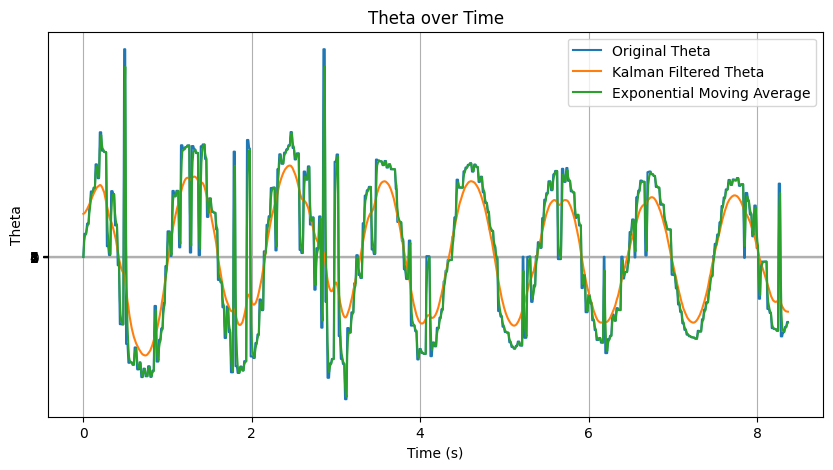

In [34]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pykalman import KalmanFilter
from sklearn.metrics import mean_squared_error

# Path to the CSV file
csv_file_path = 'test_data.csv'

# Read the data from the CSV file
df = pd.read_csv(csv_file_path)

# Convert 'time' from milliseconds to seconds for plotting
df['time_seconds'] = df['time'] / 1000

def apply_kalman_filter(data, process_variance, observation_variance):
    measurements = data['theta'].values
    
    kf = KalmanFilter(
        initial_state_mean=measurements[0],
        initial_state_covariance=1.0,
        transition_matrices=1.0,  
        observation_matrices=1.0,  
        transition_covariance=process_variance,  
        observation_covariance=observation_variance,
    )
    
    # Filter the data
    filtered_state_means, filtered_state_covariances = kf.smooth(measurements)

    # Calculate metrics
    mse = mean_squared_error(measurements, filtered_state_means)
    
    return filtered_state_means, mse

def apply_exponential_moving_average(data, alpha):
    ema = data['theta'].ewm(alpha=alpha).mean()
    return ema

def apply_moving_average(data, window_size):
    ma = data['theta'].rolling(window=window_size).mean()
    return ma

# Apply filters
filtered_state_means, mse = apply_kalman_filter(df, process_variance=0.001, observation_variance=0.1)

ema = apply_exponential_moving_average(df, alpha=0.6)

# ma = apply_moving_average(df, window_size=5)

print("Filtered State Means:", filtered_state_means)
print("Mean Squared Error:", mse)

# Plot the original and filtered data
plt.figure(figsize=(10, 5))
plt.plot(df['time_seconds'], df['theta'], label='Original Theta')
plt.plot(df['time_seconds'], filtered_state_means, label='Kalman Filtered Theta')
plt.plot(df['time_seconds'], ema, label='Exponential Moving Average')
# plt.plot(df['time_seconds'], ma, label='Moving Average')
plt.xlabel('Time (s)')
plt.ylabel('Theta')
plt.title('Theta over Time')
plt.legend()
plt.grid(True)

# Set the y-axis labels to display every second
plt.yticks(range(0, int(df['time_seconds'].max()) + 1, 1))

# Show the plot
plt.show()
